<center><h1> AGRICULTURE ANALYSIS AND PREDICTION </h1></center>








#### In this data set, we have taken 5 types of Soil - Alluvial, Red, Black, Mountain and Laterite. Month column is encoded with January to December as 0 to 11. State are encoded in alphabetical order and with last 5 as union territories as per the geo-political data of F.Y 2014. Other columns are the different types of crops grown and their priority.

In [45]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [46]:
df = pd.read_csv('data.csv')
df.head()

,State,Crop,Profit,Yield,Month of highest rainfall,Month of lowest rainfall,Suggested or not
0,Andhra Pradesh,Rice,63851.839100,2921.1860,6,1,1
1,Andhra Pradesh,Wheat,1.000000,792.5500,6,1,0
2,Andhra Pradesh,Cotton,1.000000,337.1242,6,1,0
3,Arunachal Pradesh,Rice,999.586564,1190.4790,8,12,1
4,Arunachal Pradesh,Wheat,2388.555551,1641.0000,8,12,1


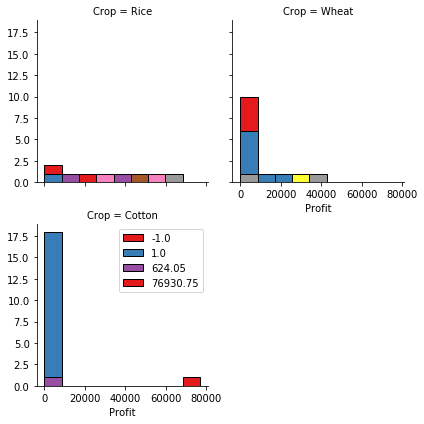

In [47]:
import seaborn as sns
bins = np.linspace(df.Profit.min(), df.Profit.max(), 10)
g = sns.FacetGrid(df, col="Crop", hue="Profit", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Profit', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [48]:
df['Crop'].replace(to_replace=['Rice','Wheat','Cotton'], value=[0,1,2],inplace=True)
df.head()

,State,Crop,Profit,Yield,Month of highest rainfall,Month of lowest rainfall,Suggested or not
0,Andhra Pradesh,0,63851.839100,2921.1860,6,1,1
1,Andhra Pradesh,1,1.000000,792.5500,6,1,0
2,Andhra Pradesh,2,1.000000,337.1242,6,1,0
3,Arunachal Pradesh,0,999.586564,1190.4790,8,12,1
4,Arunachal Pradesh,1,2388.555551,1641.0000,8,12,1


## Data Visualization and analysis

For basic understanding of the data and inter relations between attributes

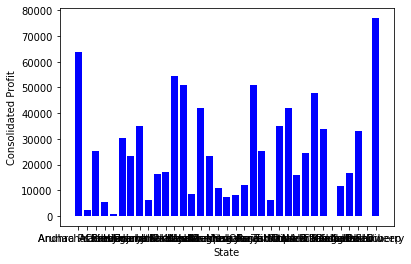

In [49]:
plt.bar(df.State, df.Profit,  color='blue')
plt.xlabel("State")
plt.ylabel("Consolidated Profit")
plt.show()

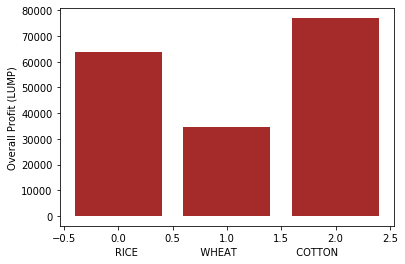

In [50]:
plt.bar(df.Crop, df.Profit,  color='brown') 
plt.xlabel("RICE                    WHEAT                   COTTON")
plt.ylabel("Overall Profit (LUMP)")
plt.show()

In [51]:
Feature = df[['State','Crop','Profit','Yield','Month of highest rainfall','Month of lowest rainfall']]
Feature = pd.concat([Feature,pd.get_dummies(df['State'])], axis=1)
Feature.drop(['State'],axis = 1,inplace=True)
Feature.head()

,Crop,Profit,Yield,Month of highest rainfall,Month of lowest rainfall,A & N Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Orissa,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,63851.839100,2921.1860,6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.000000,792.5500,6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.000000,337.1242,6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,999.586564,1190.4790,8,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2388.555551,1641.0000,8,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X = Feature
X[0:5]

,Crop,Profit,Yield,Month of highest rainfall,Month of lowest rainfall,A & N Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Orissa,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,63851.839100,2921.1860,6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.000000,792.5500,6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.000000,337.1242,6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,999.586564,1190.4790,8,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2388.555551,1641.0000,8,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df['Suggested or not'].values
y[:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [54]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\Satya Teja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Satya Teja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-1.22474487,  3.26076343,  1.56987494, -1.86937386, -1.44166613,
        -0.17149859,  5.83095189, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859],
       [ 0.        , -0.63978844, -0.32854647, -1.86937386, -1.44166613,
        -0.17149859,  5.83095189, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
        -0.17149859, -0.17149859, -0.17149859, -0.

## Training and Testing set creation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=4)

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_per_k = {'train' : [], 'test': []}
for k in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    accuracy_per_k['train'].append(accuracy_score(y_train, neigh.predict(X_train)))
    accuracy_per_k['test'].append(accuracy_score(y_test, neigh.predict(X_test)))

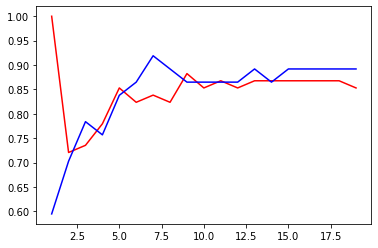

In [57]:
plt.plot(range(1, 20), accuracy_per_k['train'], 'r')
plt.plot(range(1, 20), accuracy_per_k['test'], 'b')
#plt.axvline(x=7)
plt.show()

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
print("Train set accuracy: ", accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set accuracy: ", accuracy_score(y_test, knn_model.predict(X_test)))
knn_accuracy=accuracy_score(y_test, knn_model.predict(X_test))
knntrain_accuracy=accuracy_score(y_train, knn_model.predict(X_train))

Train set accuracy:  0.8382352941176471
Test set accuracy:  0.918918918918919


## Decision Tree

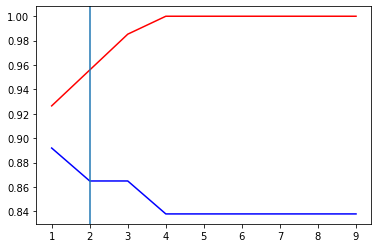

In [59]:
from sklearn.tree import DecisionTreeClassifier 

accuracy_per_depth = {'train' : [], 'test': []}
for k in range(1, 10):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=k).fit(X_train, y_train)
    accuracy_per_depth['train'].append(accuracy_score(y_train, tree.predict(X_train)))
    accuracy_per_depth['test'].append(accuracy_score(y_test, tree.predict(X_test)))

plt.plot(range(1, 10), accuracy_per_depth['train'], 'r')
plt.plot(range(1, 10), accuracy_per_depth['test'], 'b')
plt.axvline(x=2)
plt.show()

In [60]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train, y_train)
tree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
print("Train set accuracy: ", accuracy_score(y_train, tree_model.predict(X_train)))
print("Test set accuracy: ", accuracy_score(y_test, tree_model.predict(X_test)))
dtree_accuracy=accuracy_score(y_test, tree_model.predict(X_test))
dtreetrain_accuracy=accuracy_score(y_train, tree_model.predict(X_train))

Train set accuracy:  0.9558823529411765
Test set accuracy:  0.8648648648648649


## SVM

In [62]:
from sklearn import svm
svm_model = svm.SVC(probability=True).fit(X_train, y_train)
svm_model

C:\Users\Satya Teja\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
svm_accuracy=accuracy_score(y_test, svm_model.predict(X_test))
svmtrain_accuracy=accuracy_score(y_train, svm_model.predict(X_train))
print("Test set accuracy: ", svm_accuracy)

Test set accuracy:  0.6486486486486487


## Further testing the models with realtime data 

Open the csv file named test_data.csv and enter the data for which you need the prediction like the sample data I have created here and then run the codes below line by line to check upon real data prediction..

In [64]:
testdf=pd.read_csv('test_data.csv')
testdf.head()

,Crop,Profit,Yield,Month of highest rainfall,Month of lowest rainfall,A & N Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Orissa,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,Rice,730.0,1177,7,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wheat,1.0,1876,7,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cotton,1.0,136,7,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Rice,30230.0,2652,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wheat,-1.0,996,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
testdf['Crop'].replace(to_replace=['Rice','Wheat','Cotton'], value=[0,1,2],inplace=True)
testdf.head()

,Crop,Profit,Yield,Month of highest rainfall,Month of lowest rainfall,A & N Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Orissa,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,730.0,1177,7,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,1876,7,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,136,7,12,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,30230.0,2652,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-1.0,996,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Prediction using Decision Tree
treelist=tree_model.predict(testdf)
length=len(treelist)
for i in range(length):
    if(treelist[i]==0):
        print("Not Suggested")
    elif(treelist[i]==1):
        print("Suggested")

Suggested
Suggested
Suggested
Suggested
Not Suggested
Not Suggested
Suggested
Suggested
Suggested
Suggested
Suggested
Suggested


In [67]:
#Prediction using KNN
knnlist=knn_model.predict(testdf)
length2=len(knnlist)
for i in range(length2):
    if(knnlist[i]==0):
        print("Not Suggested")
    elif(knnlist[i]==1):
        print("Suggested")

Suggested
Suggested
Suggested
Suggested
Suggested
Not Suggested
Suggested
Suggested
Suggested
Suggested
Suggested
Suggested


In [68]:
#Prediction using svm
svmlist=svm_model.predict(testdf)
length3=len(svmlist)
for i in range(length3):
    if(svmlist[i]==0):
        print("Not Suggested")
    elif(svmlist[i]==1):
        print("Suggested")

Suggested
Suggested
Suggested
Suggested
Suggested
Not Suggested
Suggested
Suggested
Suggested
Suggested
Suggested
Suggested


# FINAL REPORT

In [69]:
# report
report_data = [
            {'Algorithm':'KNN', 'Test Accuracy': knn_accuracy,'Training Accuracy': knntrain_accuracy},
            {'Algorithm':'Decision Tree', 'Test Accuracy': dtree_accuracy,'Training Accuracy': dtreetrain_accuracy},
            {'Algorithm':'SVM', 'Test Accuracy': svm_accuracy,'Training Accuracy': svmtrain_accuracy}
         ] 
report_df = pd.DataFrame(report_data)
report_df

,Algorithm,Test Accuracy,Training Accuracy
0,KNN,0.918919,0.838235
1,Decision Tree,0.864865,0.955882
2,SVM,0.648649,0.955882


In [70]:
if(knn_accuracy>dtree_accuracy and knn_accuracy>svm_accuracy):
    print('Hence, KNN is preferred for its comparatively good performance with this data.')
elif(svm_accuracy>dtree_accuracy):
    print('Hence, SVM is preferred for its comparatively good performance with this data.')
else:
    print('Hence, Decision Tree is preferred for its comparatively good performance with this data.')    

Hence, KNN is preferred for its comparatively good performance with this data.


<h1><center>---------------------------------------------------------------------------------------</center></h1>
<h1><center>---------------------------------------------------------------------------------------</center></h1>